# HCC1806 Data Preprocessing

## Introduction
The structure of the file is the following:
1. EDA (Exploratory Data Analysis)
    * Metadata Files
    * Sequencing Data (HCC1806)
        * Description
        * Duplicates    
            * Cells correlation 
        * Sparsity and NANs
        * Labeling
        * Outliers
            * Boxplot
            * IQR
            * After Normalization  
        * Distribution
            * Histogram
            * (Density Plot)
            * Test for Normality
            * Test for other distributions
        * Correlation
            * More on cells correlation
            * Genes correlation
        * Transformations
        * Normalization

2. Dimensionality Reduction 
## Materials and Methods

## Libraries

In [1]:
# Check for libraries that are needed
!pip install pandas
!pip install numpy==1.19.5
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1021 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      Cythonizing sources
      numpy/random/_bounded_integers.pxd.in has not changed
      numpy/random/_philox.pyx has not changed
      numpy/random/_bounded_integers.pyx.in has not changed
      numpy/random/_sfc64.pyx has not changed
      numpy/random/_mt19937.pyx has not changed
      numpy/random/bit_generator.pyx has not changed
      Processing numpy/random/_bounded_integers.pyx
      numpy/random/mtrand.pyx has not changed
      numpy/random/_generator.pyx has not changed
      numpy/random/_pcg64.pyx 

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


------------------------------------------------------------------------

------------------------------------------------------------------------

## EDA (Exploratory Data Analysis)
Now we start by loading the 4 dataset.
Each of them is from a single experiment, and each experiment is different because of the sequencing technique for the cells' RNA, and of the cells' environment.

### Metadata files
We start with the metadata files, one for each experiment. They are TSV files

In [3]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')
print("Dataframe dimensions:", df_metaM.shape)
print("Dataframe columns:", df_metaM.columns)

Dataframe dimensions: (383, 9)
Dataframe columns: Index(['Filename', 'Cell Line', 'Lane', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')


In [4]:
#we drop the first column 'Filename' as it is not needed

df_metaM = df_metaM.drop(columns=['Filename'])
df_metaM.head()

,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [5]:
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
print("Dataframe dimensions:", df_metaH.shape)
print("Dataframe columns:", df_metaH.columns)

Dataframe dimensions: (243, 9)
Dataframe columns: Index(['Filename', 'Cell Line', 'PCR Plate', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')


In [6]:
df_metaH.head()

,Filename,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


## What is the dataset made of?

For every row, we have a single observation from an experiment, and of course in the columns we have the collected data of the experiment. In order:
#### 1.  Cell Line 
  Content

#### 2. Lane
  Content

#### 3. Pos
  Content

#### 4. Condition
  Content

#### 5. Hours
  Content

#### 6. Cell Name
  Content

#### 7. Preprocessing Tag
  Content
  
#### 8. ProcessingComments
  Content


## Sequencing data

Now we go to sequencing data, and we notice that they are space-delimited.
Here we just create the path and the dataset on Python.
 


In [7]:
#We just create the path and the dataset on Python
df_seq_pathHFilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Data.txt'

df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathHUnfilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt'

df_seq_pathMFilt = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Data.txt'

df_seq_pathMFiltNorm = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathMUnfilt = '../ai_lab/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt'

df_seq_HFilt = pd.read_csv(df_seq_pathHFilt, delimiter=' ')

df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

df_seq_HUnfilt = pd.read_csv(df_seq_pathHUnfilt, delimiter=' ')

df_seq_MFilt = pd.read_csv(df_seq_pathMFilt, delimiter=' ')

df_seq_MFiltNorm = pd.read_csv(df_seq_pathMFiltNorm, delimiter=' ')

df_seq_MUnfilt = pd.read_csv(df_seq_pathMUnfilt, delimiter=' ')

There are six dataset, and we can understand what they actually are based on their name, for the EDA part we focus on the Unfiltered datased but then we will use Filtered and Normalised one for supervised/uns ML.

#### 1. SmartSeq\HCC1806_SmartS_Unfiltered_Data.txt
  The cell line is HCC1806, the technology is SmartS, and this dataset contains the Unfiltered data

#### 2. SmartSeq\MCF7_SmartS_Unfiltered_Data.txt
  The cell line is MCF7, the technology is SmartS, and this dataset contains the Unfiltered data



We analyze one dataset at a time.

#### 1. SmartSeq\HCC1806_SmartS_Unfiltered_Data.txt

In [8]:
# Exploring the dataframe for the unfiltered data
print("Dataframe dimension:", df_seq_HUnfilt.shape)
print("First Column:", df_seq_HUnfilt.iloc[:,0])
print("Columns list:", list(df_seq_HUnfilt.columns))
# Hence we see features on the rows and therefore we need to transpose the data matrix

Dataframe dimension: (23396, 243)
First Column: WASH7P         0
CICP27         0
DDX11L17       0
WASH9P         0
OR4F29         2
            ... 
MT-TE         22
MT-CYB      4208
MT-TT         26
MT-TP         66
MAFIP          0
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, Length: 23396, dtype: int64
Columns list: ['output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPl

In [9]:
# Check for the types of data in the dataframe
print("Data types in the dataframe:", df_seq_HUnfilt.dtypes)
# Check for features
gene_symbols = df_seq_HUnfilt.index
print("Gene symbols in the dataframe:",gene_symbols)

Data types in the dataframe: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       int64
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        int64
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     int64
Length: 243, dtype: object
Gene symbols in the dataframe: Index(['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F2

In [10]:
# Take the transpose of the dataframe
print("Dataframe dimension before transpose:", df_seq_HUnfilt.shape)
df_seq_HUnfilt = df_seq_HUnfilt.T
print("Dataframe dimension after transpose:", df_seq_HUnfilt.shape)
df_seq_HUnfilt.head(5)


Dataframe dimension before transpose: (23396, 243)
Dataframe dimension after transpose: (243, 23396)


,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,0,2,250,54,1740,6,1,...,17,5,15,3852,900,22,4208,26,66,0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,0,424,100,2340,5,1,...,49,29,36,7457,1439,43,6491,62,71,4
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,0,0,0,0,0,11,0,22,0,0,...,0,0,0,93,12,0,25,0,1,0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,0,63,16,1020,3,0,...,43,17,8,1479,234,0,4819,11,3,7
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,0,27,3,303,0,0,...,0,0,3,303,33,0,310,4,9,0


In [11]:
# Now we look at evetual missing values in the dataframe
print("Missing values in the dataframe by columns:", df_seq_HUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_HUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: WASH7P      0
CICP27      0
DDX11L17    0
WASH9P      0
OR4F29      0
           ..
MT-TE       0
MT-CYB      0
MT-TT       0
MT-TP       0
MAFIP       0
Length: 23396, dtype: int64
Missing values in the whole dataframe: 0


In [12]:
df_seq_HUnfilt.describe()

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.045267,0.119342,0.469136,0.255144,0.127572,117.930041,28.427984,904.308642,1.403292,0.378601,...,10.358025,5.930041,13.493827,2290.213992,386.901235,18.246914,2163.588477,20.613169,46.444444,3.897119
std,0.318195,0.594531,1.455282,0.818639,0.440910,103.038022,26.062662,654.520308,1.735003,0.747361,...,10.910199,7.040559,11.803967,1726.423259,309.276105,54.076514,1730.393947,22.224590,47.684223,4.736193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,46.500000,8.000000,390.500000,0.000000,0.000000,...,2.000000,1.000000,4.000000,918.000000,138.500000,4.000000,947.500000,5.000000,14.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,22.000000,790.000000,1.000000,0.000000,...,7.000000,4.000000,10.000000,1848.000000,320.000000,11.000000,1774.000000,14.000000,38.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,42.000000,1208.000000,2.000000,1.000000,...,14.000000,7.500000,20.000000,3172.000000,528.000000,20.000000,2927.000000,30.500000,64.500000,6.000000
max,3.000000,5.000000,12.000000,6.000000,4.000000,694.000000,120.000000,3569.000000,12.000000,4.000000,...,52.000000,43.000000,57.000000,8972.000000,1439.000000,804.000000,11383.000000,154.000000,409.000000,24.000000


In [13]:
# Now we want to add the target column (i.e. the class) to the dataframe, we get the condition from metadata
print(df_metaH.columns)
df_metaH.set_index('Filename', inplace=True)
# Merge the two dataframes with key 'Filename'
merged_df = pd.merge(df_seq_HUnfilt, df_metaH['Condition'], left_index=True, right_index=True)
print(merged_df.columns)

Index(['Filename', 'Cell Line', 'PCR Plate', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')
Index(['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F29', 'MTND1P23',
       'MTND2P28', 'MTCO1P12', 'MTCO2P12', 'MTATP8P1',
       ...
       'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT',
       'MT-TP', 'MAFIP', 'Condition'],
      dtype='object', length=23397)


In [14]:
# Now transform the categorical variable 'Condition' to numerical
dummy_variables = pd.get_dummies(merged_df['Condition'], prefix='category').astype('int')
merged = pd.concat([merged_df, dummy_variables], axis=1)
print(merged.head())
merged.drop(columns=['category_Hypo', 'Condition'], inplace=True)
merged.rename(columns={'category_Normo': 'Target'}, inplace=True)
# Note that 1 = Hypo, 0 = Norm

                                                    WASH7P  CICP27  DDX11L17  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       0       0         0   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       0       0         0   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...       0       0         0   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       0       0         0   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...       0       0         0   

                                                    WASH9P  OR4F29  MTND1P23  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       0       2       250   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       0       0       424   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...       0       0        11   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       0       0        63   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...       0       0        27   

                                      

In [15]:
merged.head()

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,0,2,250,54,1740,6,1,...,5,15,3852,900,22,4208,26,66,0,1
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,0,424,100,2340,5,1,...,29,36,7457,1439,43,6491,62,71,4,1
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,0,0,0,0,0,11,0,22,0,0,...,0,0,93,12,0,25,0,1,0,0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,0,63,16,1020,3,0,...,17,8,1479,234,0,4819,11,3,7,0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,0,27,3,303,0,0,...,0,3,303,33,0,310,4,9,0,0


We now look for:
1. Duplicates
2. Sparsity
3. NaNs
4. Outliers
5. Distributions
6. Correlation
7. Normalization

In [16]:
# Check for duplicates
print("Number of duplicates in the dataframe:", merged.duplicated().sum())
# we will now check for duplicates in a broader sense, by checking for observations with high correlation
# we start by computing the correlation matrix of the observations
merged_t = merged.T
correlation_matrix_transpose = merged_t.corr()
correlation_matrix_transpose

Number of duplicates in the dataframe: 0


In [ ]:
# now we will check for observations with high correlation and drop them
columns_to_keep = []

def add_representative(corr_matrix, col, threshold=0.95):
    corr = corr_matrix[col].drop(col)
    max_corr_id = corr.idxmax()
    max_corr = corr[max_corr_id]
    if max_corr < threshold:
        columns_to_keep.append(col)
        return None
    else:
        if (col not in columns_to_keep) and (max_corr_id not in columns_to_keep):
            columns_to_keep.append(col)
            print('choosing %s as representative for %s with correlation %s' % (col, max_corr_id, max_corr))
            return None
        


for col in merged_t:
    add_representative(correlation_matrix_transpose, col, 0.95)

dropped_cols = [col for col in merged_t if col not in columns_to_keep]

merged_uncorr_obs = merged_t[columns_to_keep].T
print('dropped %s observations' % str(len(dropped_cols)))
merged_uncorr_obs

In [17]:
# Check for sparsity
total_elements = merged.shape[0] * merged.shape[1]
print("Total number of elements in the DataFrame:", total_elements)
missing_values = (merged == 0).sum().sum()
print("Total number of missing values in the DataFrame:", missing_values)
# Calculate the sparsity as the percentage of missing values
sparsity = (missing_values / total_elements) * 100
print("Sparsity of the DataFrame: {:.2f}%".format(sparsity))

Total number of elements in the DataFrame: 5685471
Total number of missing values in the DataFrame: 3175077
Sparsity of the DataFrame: 55.85%


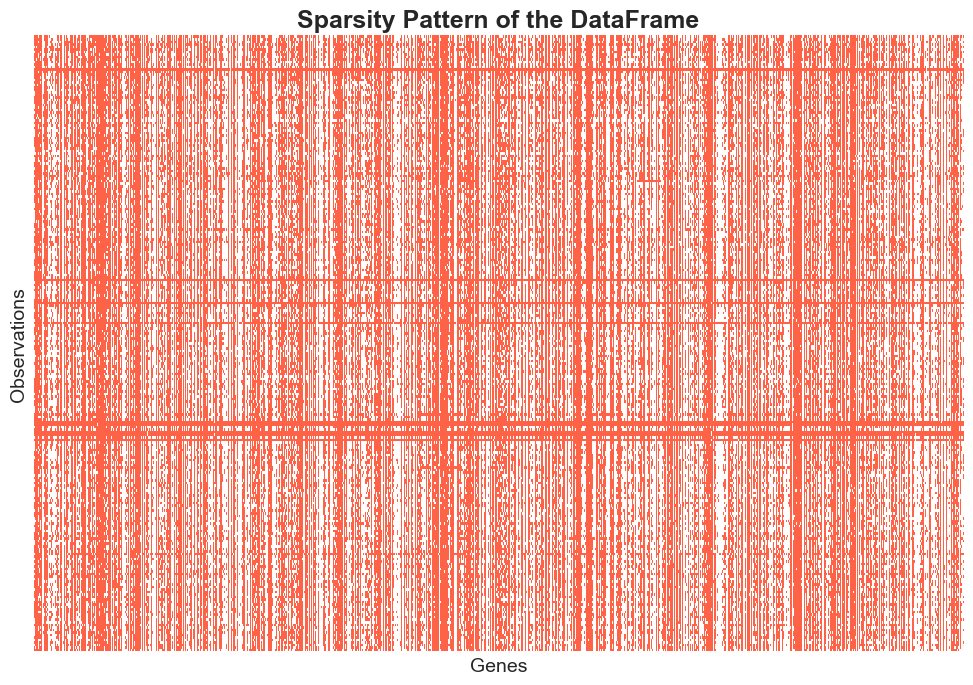

In [18]:
# Visualization of sparsity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged is your DataFrame

# Create a binary DataFrame indicating missing values (1 for missing, 0 for not missing)
missing_mask = merged == 0

# Set up a custom color palette
colors = ["#FFFFFF", "#FF6347"]  # White for non-missing, red for missing

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cmap=sns.color_palette(colors), cbar=False, xticklabels=False, yticklabels=False)

# Add title and labels with custom font size and style
plt.title('Sparsity Pattern of the DataFrame', fontsize=18, fontweight='bold')
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Observations', fontsize=14)



# Remove the spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


In [19]:
# Check for NaN values
print("Number of NaN values in the DataFrame:", merged.isna().sum().sum())

Number of NaN values in the DataFrame: 0


for outliers: first we do boxplot : it doesnt work because otherwise you remove too many rows
then inter-quantile range prox rule: it works(?)
z score we don t do it because not norm distr
edo's one with normalization


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

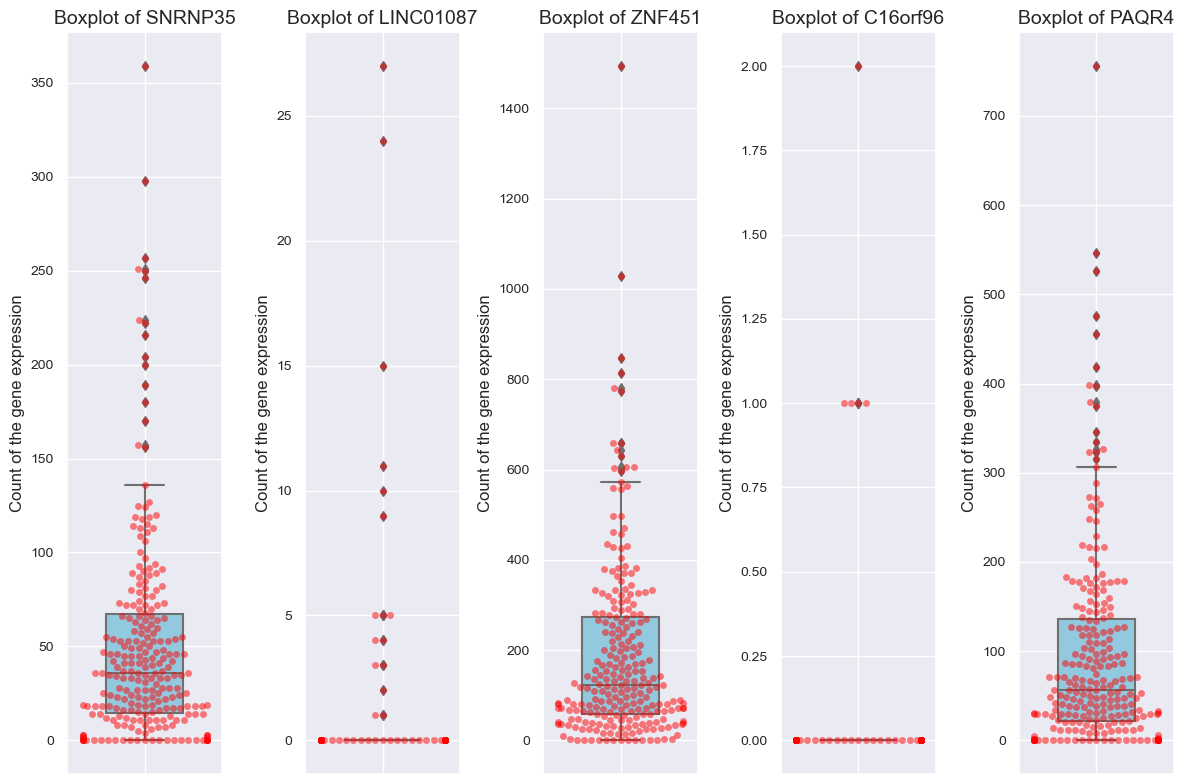

In [20]:
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 5

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)


plt.figure(figsize=(12, 8))  
for i, column in enumerate(random_columns):
    plt.subplot(1, len(random_columns), i+1)
    
    # Customizing boxplot appearance
    sns.boxplot(y=merged[column], color='skyblue', width=0.5)
    
    # Overlaying swarmplot for better visualization of individual data points
    sns.swarmplot(y=merged[column], color='red', alpha=0.5)
    
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel('Count of the gene expression', fontsize=12)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)


plt.tight_layout()
plt.show()

In [21]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = merged.quantile(0.25)
Q3 = merged.quantile(0.75)
IQR = Q3 - Q1
outliers = (merged < (Q1 - 1.5 * IQR)) | (merged > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: WASH7P       6
CICP27      13
DDX11L17    43
WASH9P      34
OR4F29      24
            ..
MT-CYB       9
MT-TT        5
MT-TP        9
MAFIP        9
Target       0
Length: 23397, dtype: int64
6.87%


Another approach: normalize each column independently and find the outliers of the flattened array

In [22]:
# now we normalize each column independently
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_df_normalized = merged[merged.columns[:-1]].copy()
features_df_normalized[features_df_normalized.columns] = scaler.fit_transform(features_df_normalized[features_df_normalized.columns])
features_df_normalized.describe()

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,...,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02
mean,-1.462022e-17,2.558539e-17,4.020561e-17,-2.558539e-17,-5.848088e-17,4.386066e-17,-4.797260e-17,-1.462022e-17,5.482583e-17,-4.523131e-17,...,-4.386066e-17,-3.655055e-18,-5.551115e-17,7.310110e-17,7.310110e-17,-1.462022e-17,2.924044e-17,6.213594e-17,3.655055e-17,-4.386066e-17
std,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,...,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00
min,-1.425569e-01,-2.011465e-01,-3.230330e-01,-3.123119e-01,-2.899350e-01,-1.146892e+00,-1.093006e+00,-1.384487e+00,-8.104817e-01,-5.076292e-01,...,-9.513487e-01,-8.440070e-01,-1.145520e+00,-1.329304e+00,-1.253572e+00,-3.381241e-01,-1.252925e+00,-9.294081e-01,-9.760106e-01,-8.245363e-01
25%,-1.425569e-01,-2.011465e-01,-3.230330e-01,-3.123119e-01,-2.899350e-01,-6.946705e-01,-7.854204e-01,-7.866358e-01,-8.104817e-01,-5.076292e-01,...,-7.676556e-01,-7.016796e-01,-8.059513e-01,-7.964711e-01,-8.048276e-01,-2.640022e-01,-7.042318e-01,-7.039677e-01,-6.818064e-01,-8.245363e-01
50%,-1.425569e-01,-2.011465e-01,-3.230330e-01,-3.123119e-01,-2.899350e-01,-2.327241e-01,-2.471448e-01,-1.750054e-01,-2.329244e-01,-5.076292e-01,...,-3.084229e-01,-2.746976e-01,-2.965985e-01,-2.566733e-01,-2.167620e-01,-1.342888e-01,-2.256091e-01,-2.981751e-01,-1.774565e-01,-4.013846e-01
75%,-1.425569e-01,-2.011465e-01,-3.230330e-01,-3.123119e-01,-2.899350e-01,3.799626e-01,5.218204e-01,4.649484e-01,3.446330e-01,8.331740e-01,...,3.345028e-01,2.234481e-01,5.523229e-01,5.118131e-01,4.571643e-01,3.248554e-02,4.420885e-01,4.457782e-01,3.794299e-01,4.449188e-01
max,9.305078e+00,8.226199e+00,7.939812e+00,7.032054e+00,8.800929e+00,5.602388e+00,3.520785e+00,4.079616e+00,6.120206e+00,4.855584e+00,...,3.824671e+00,5.276069e+00,3.693332e+00,3.878294e+00,3.408832e+00,1.456039e+01,5.338923e+00,6.014156e+00,7.618953e+00,4.253284e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x2a61b4550>,
 'caps': [<matplotlib.lines.Line2D at 0x2a61b5910>,
 'boxes': [<matplotlib.lines.Line2D at 0x297278490>],
 'medians': [<matplotlib.lines.Line2D at 0x2a61b6b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a61b7410>],
 'means': []}

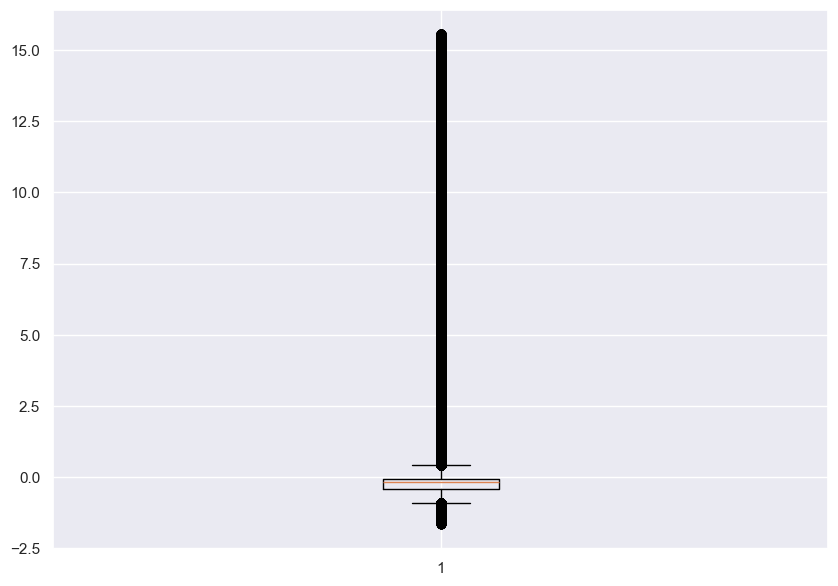

In [23]:
# convert the dataframe to a numpy array, find outliers
features_array_normalized = np.array(features_df_normalized.T)
# still need to find the outliers
fig = plt.figure(figsize=(10, 7))
plt.boxplot(features_array_normalized.flatten())
# here, we notice that most of the data are outliers

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

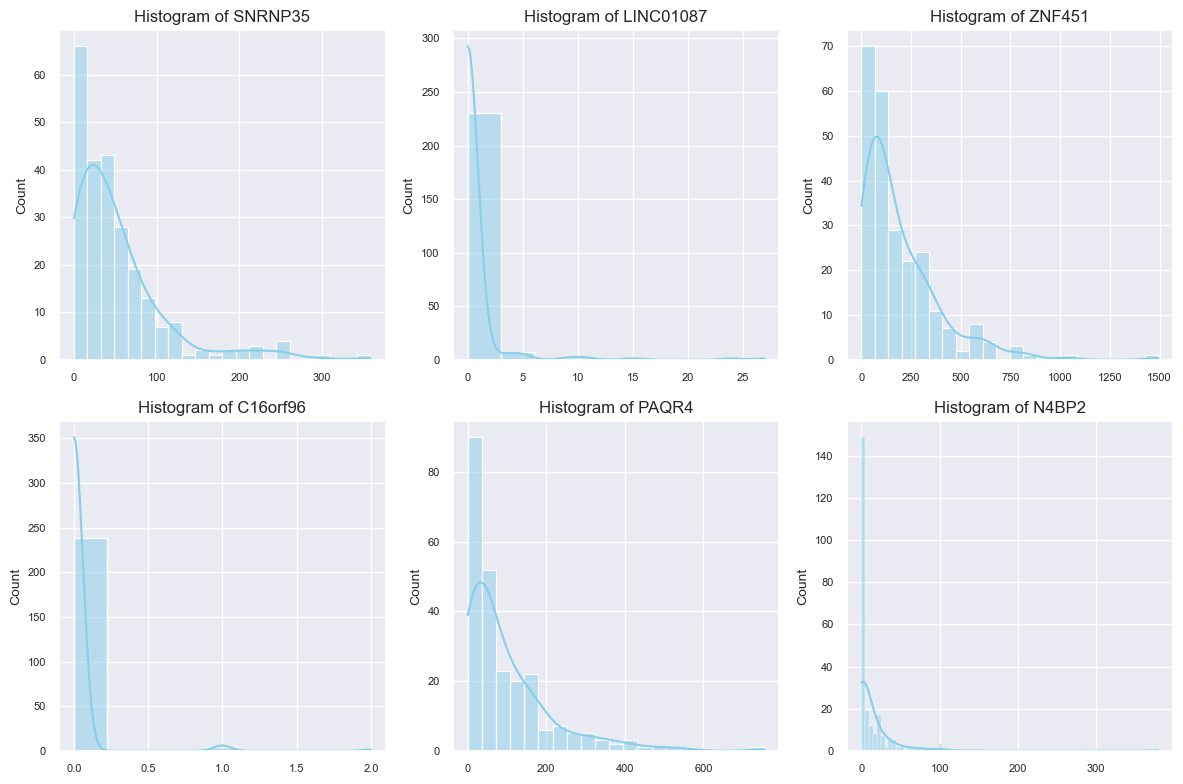

In [24]:
#visualize the distribution of the data through histograms
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 6

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)



fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    sns.histplot(merged[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()



say something like: we see that most of the genes have the following distr:
most of the time 0, then start to decrease and right-skewed

In [25]:
from scipy.stats import skew

# Calculate skewness for each column in your DataFrame
skewness_values = merged[random_columns].skew()

# Print skewness values
print("Skewness for each selected feature:")
print(skewness_values)

Skewness for each selected feature:
SNRNP35      2.257435
LINC01087    7.124652
ZNF451       2.311733
C16orf96     8.137747
PAQR4        2.198802
N4BP2        7.039415
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


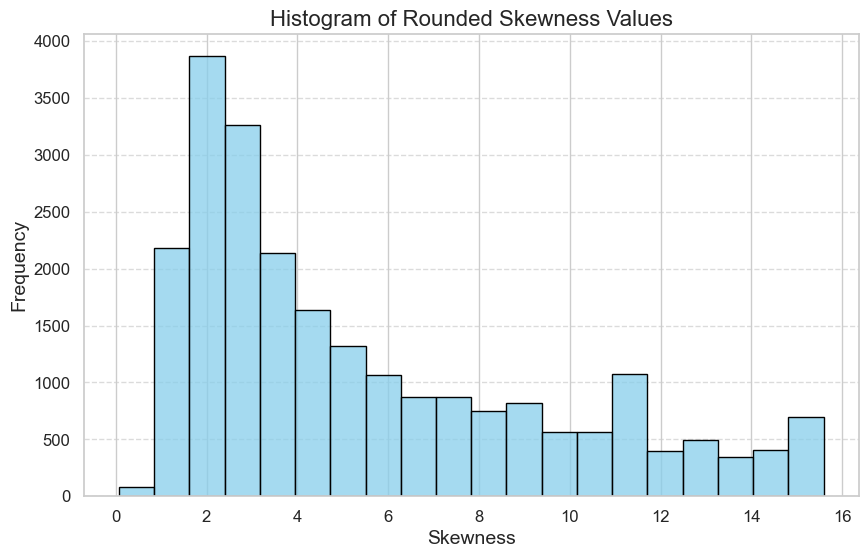

In [26]:
# Calculate skewness for each column in your DataFrame
skewness_values = merged.skew()

# Round the skewness values
rounded_skewness_values = np.round(skewness_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_skewness_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Skewness Values', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
from scipy.stats import kurtosis

# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged[random_columns].kurtosis()

# Print kurtosis values
print("Kurtosis for each feature:")
print(kurtosis_values)

Kurtosis for each feature:
SNRNP35       6.323875
LINC01087    56.738590
ZNF451        8.452931
C16orf96     72.786616
PAQR4         6.484577
N4BP2        71.977300
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


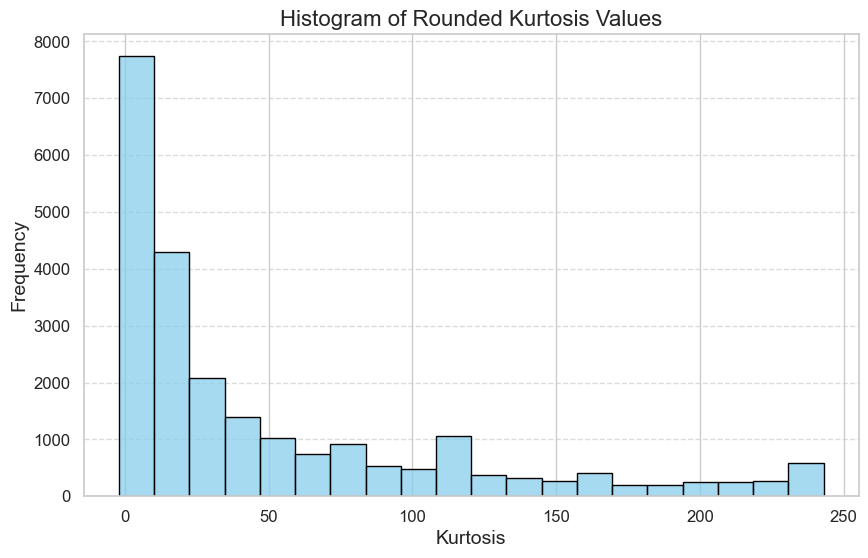

In [28]:
from scipy.stats import kurtosis

# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged.kurtosis()

# Round the kurtosis values
rounded_kurtosis_values = np.round(kurtosis_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded kurtosis values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_kurtosis_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Kurtosis Values', fontsize=16)
plt.xlabel('Kurtosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [29]:
# Test the distribution of the data matrix using Kolmogorov-Smirnov
from scipy.stats import kstest

# Test normality of each feature
def test_distribution_per_feature(data):
    non_normal_count = 0
    for column in data.columns:
        p_value = kstest(data[column], 'norm')[1]
        if p_value < 0.05:
            non_normal_count += 1
    print("Number of features with non-normal distribution:", non_normal_count)
    if data.shape[1] == non_normal_count:
        print("All features have non-normal distribution")
    else:
        print("Not all features have non-normal distribution")
    return non_normal_count

non_normal_count = test_distribution_per_feature(merged)


Number of features with non-normal distribution: 23397
All features have non-normal distribution


In [30]:
from scipy.stats import poisson
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df' with columns you want to test
# Iterate over columns and perform the test
def test_poissondistribution_per_feature(data):
    for column in data.columns:
        observed_values = data[column].values  # Observed counts from your data
        expected_values = poisson.pmf(observed_values, observed_values.mean()) * len(observed_values)
        expected_values += 1e-10  # Adjust this value if needed

        contingency_table = [[observed_values[i], expected_values[i]] for i in range(len(observed_values))]

        chi2, p, _, _ = chi2_contingency(contingency_table)
        non_poisson_count = 0
        # Check if the p-value is less than the significance level
        if p < 0.05:
            non_poisson_count += 1
    print("Number of features with non-poisson distribution:", non_poisson_count)

    if data.shape[1] == non_normal_count:
        print("All features have non-poisson distribution")
    else:
        print("Not all features have non-poisson distribution")
    return non_poisson_count

test_poissondistribution_per_feature(merged)


Number of features with non-poisson distribution: 0
All features have non-poisson distribution


0

In [31]:
from scipy.stats import nbinom

def test_negative_binomial_distribution_per_feature(data):
    non_negative_binomial_count = 0
    for column in data.columns:
        observed_values = data[column].values  # Observed counts from your data
        mean = observed_values.mean()
        var = observed_values.var()
        size = mean ** 2 / (var - mean)
        prob = 1 - (mean / var)
        expected_values = nbinom.pmf(observed_values, size, prob) * len(observed_values)
        expected_values += 1e-10  # Adjust this value if needed

        contingency_table = [[observed_values[i], expected_values[i]] for i in range(len(observed_values))]

        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Check if the p-value is less than the significance level
        if p < 0.01:  #we set the significance level to 0.01 here, look for explanation in the text
            non_negative_binomial_count += 1
    
    print("Number of features with non-negative binomial distribution:", non_negative_binomial_count)

    if data.shape[1] == non_negative_binomial_count:
        print("All features have non-negative binomial distribution")
    else:
        print("Not all features have non-negative binomial distribution")
        
    return non_negative_binomial_count

test_negative_binomial_distribution_per_feature(merged)



Number of features with non-negative binomial distribution: 21816
Not all features have non-negative binomial distribution


21816

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

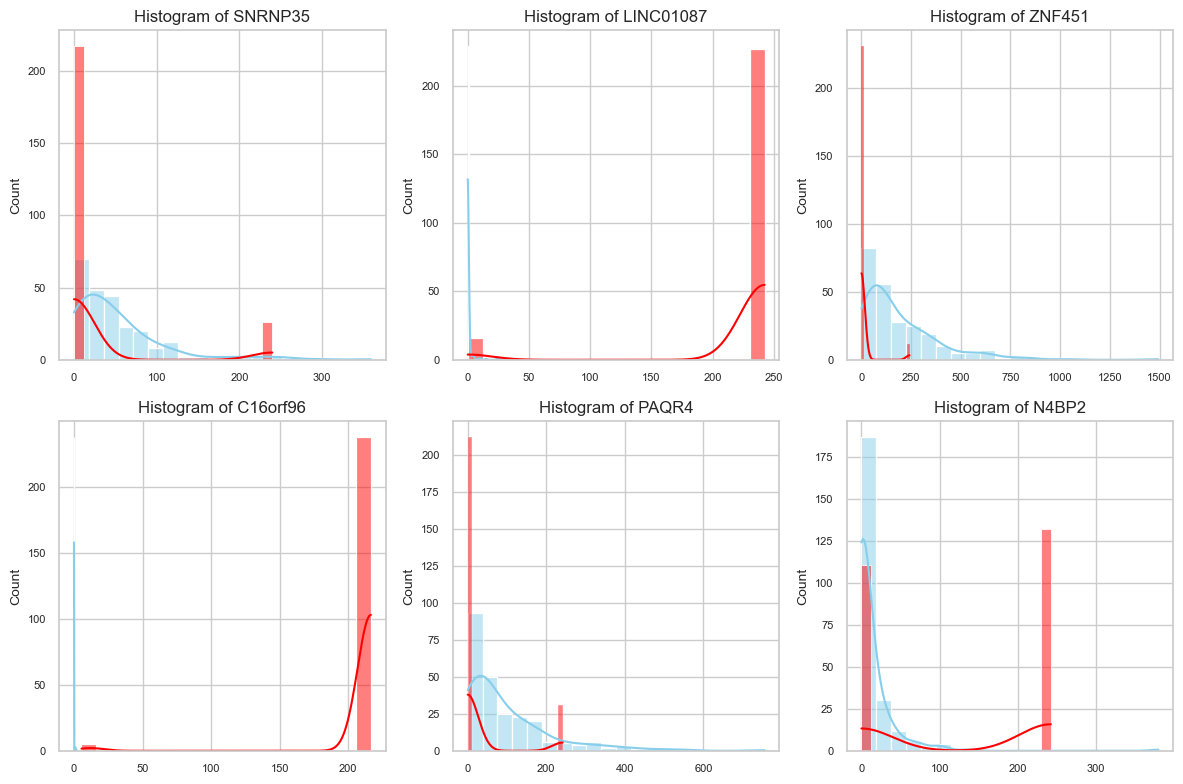

In [33]:
#now we visualize the empirical distribution against the negative binomial distribution for some columns
from scipy.stats import nbinom

np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 6

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    observed_values = merged[column].values  # Observed counts from your data
    mean = observed_values.mean()
    var = observed_values.var()
    size = mean ** 2 / (var - mean)
    prob = 1 - (mean / var)
    expected_values = nbinom.pmf(observed_values, size, prob) * len(observed_values)
    expected_values += 1e-10
    sns.histplot(observed_values, kde=True, color='skyblue', label='Observed', bins=20)
    sns.histplot(expected_values, kde=True, color='red', label='Negative Binomial', bins=20)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
from scipy.stats import gamma

def test_gamma_distribution_per_feature(data):
    non_gamma_count = 0
    for column in data.columns:
        observed_values = data[column].values  # Observed counts from your data
        shape, loc, scale = gamma.fit(observed_values)
        expected_values = gamma.pdf(observed_values, shape, loc, scale) * len(observed_values)
        expected_values += 1e-10  # Adjust this value if needed

        contingency_table = [[observed_values[i], expected_values[i]] for i in range(len(observed_values))]

        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Check if the p-value is less than the significance level
        if p < 0.05:
            non_gamma_count += 1
    
    print("Number of features with non-gamma distribution:", non_gamma_count)

    if data.shape[1] == non_gamma_count:
        print("All features have non-gamma distribution")
    else:
        print("Not all features have non-gamma distribution")
        
    return non_gamma_count

test_gamma_distribution_per_feature(merged)


Number of features with non-gamma distribution: 23396
Not all features have non-gamma distribution


23396

In [34]:
# We will use pytorch correlation matrix to calculate the correlation matrix usint torch.corrcoef
# Correlation matrix between the genes (features)

import torch as th
# Convert the DataFrame to a PyTorch tensor
data_tensor = th.tensor(merged.values).T
# Calculate the correlation matrix
correlation_matrix = th.corrcoef(data_tensor)
print(correlation_matrix)
# Nicely visuaize the correlation matrix
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix, cmap='coolwarm', yticklabels = False, xticklabels = False)
# plt.xlabel('Sample')
# plt.ylabel('Sample')
# plt.show()

# Compute the midpoint
midpoint = (correlation_matrix.max() - correlation_matrix.min()) / 2 + correlation_matrix.min()
# Print the size of the correlation matrix
print("Size of the correlation matrix: ", correlation_matrix.shape)
# Print average and minimum correlation values
print("Average correlation between cells: ", float(midpoint))
print("Minimum correlation between cells: ", float(correlation_matrix.min()), "\n")


tensor([[ 1.0000,  0.0587,  0.1681,  ...,  0.0077,  0.0771, -0.0077],
        [ 0.0587,  1.0000, -0.0315,  ...,  0.0255,  0.0088, -0.0828],
        [ 0.1681, -0.0315,  1.0000,  ...,  0.0910, -0.0589, -0.1241],
        ...,
        [ 0.0077,  0.0255,  0.0910,  ...,  1.0000,  0.2880,  0.0993],
        [ 0.0771,  0.0088, -0.0589,  ...,  0.2880,  1.0000,  0.0506],
        [-0.0077, -0.0828, -0.1241,  ...,  0.0993,  0.0506,  1.0000]])
Size of the correlation matrix:  torch.Size([23397, 23397])
Average correlation between cells:  0.2018159031867981
Minimum correlation between cells:  -0.5963682532310486 



torch.Size([243, 23397])
torch.Size([243, 243])
Indices of the minimum value in the correlation matrix:  (tensor([153]), tensor([33]))
Cell names with minimum correlation: output.STAR.PCRPlate3D11_Normoxia_S92_Aligned.sortedByCoord.out.bam, output.STAR.PCRPlate1D3_Hypoxia_S6_Aligned.sortedByCoord.out.bam


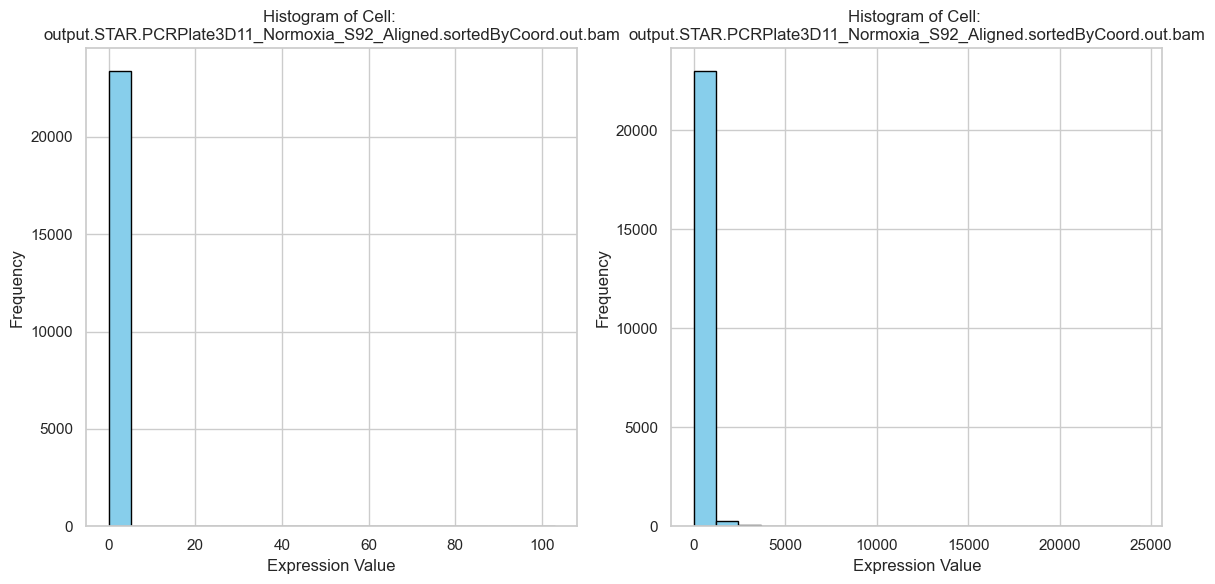

In [35]:
# We can see from the minimum value obtained that there are some cells that are 
# completely uncorrelated from the others and we want to see why
# Find the indices of the minimum value in the correlation matrix
data_tensor_transpose = data_tensor.T
print(data_tensor_transpose.shape)
correlation_matrix_transpose = th.corrcoef(data_tensor_transpose)
print(correlation_matrix_transpose.shape)
min_indices = th.where(correlation_matrix_transpose == correlation_matrix_transpose.min())
print("Indices of the minimum value in the correlation matrix: ", min_indices)
# Transform min_indices to a list
value1 = min_indices[0].item()
value2 = min_indices[1].item()
# Access rows with index value1 and value2
cells_identified = merged.iloc[[value1, value2]]
print(f"Cell names with minimum correlation: {cells_identified.index[0]}, {cells_identified.index[1]}")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(data_tensor_transpose[min_indices[0]], bins=20, color='skyblue', edgecolor='black')
# set title with corresponding cell index

axs[0].set_title(f'Histogram of Cell: \n{cells_identified.index[0]}', fontsize=12)
axs[0].set_xlabel('Expression Value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[1].hist(data_tensor_transpose[min_indices[1]], bins=20, color='skyblue', edgecolor='black')
axs[1].set_title(f'Histogram of Cell: \n{cells_identified.index[0]}', fontsize=12)
axs[1].set_xlabel('Expression Value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()



/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


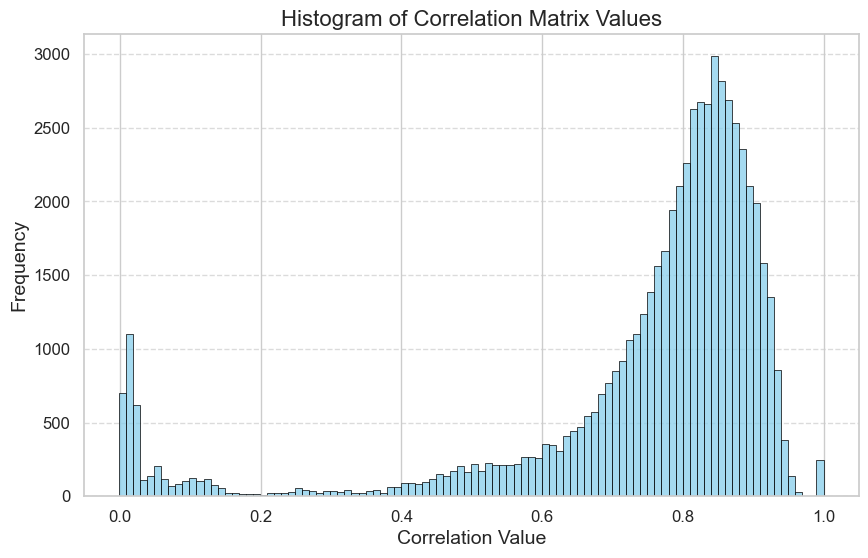

In [36]:
# Correlation between cells (samples)
# Plot histogram of the values to see the distribution
data_tensor = th.tensor(merged.values)
correlation_matrix_transpose = th.corrcoef(data_tensor)
plt.figure(figsize=(10, 6))
sns.histplot(correlation_matrix_transpose.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Correlation Matrix Values', fontsize=16)
plt.xlabel('Correlation Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Clear that we have peaks at high correlation values between cells. In principle, this is explained by the fact that every 
# gene expression in the table is coming from the same cell line we expect overall an high correlation among them.

(243, 243)


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-pa

[]

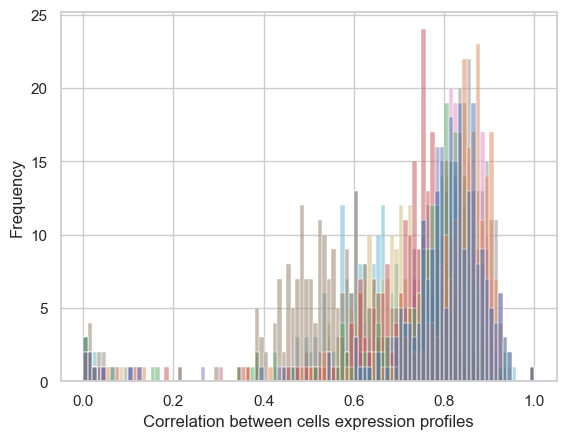

In [37]:
# We now can plot the distribution of the correlation between gene expression profiles using a 
# histogram (we do it on the first ten variables)

correlation_matrix = pd.DataFrame(correlation_matrix_transpose)
print(correlation_matrix.shape)
c_subset = correlation_matrix.iloc[:,:10]
sns.histplot(c_subset,bins=100)
plt.legend().set_visible(False)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')
plt.plot()


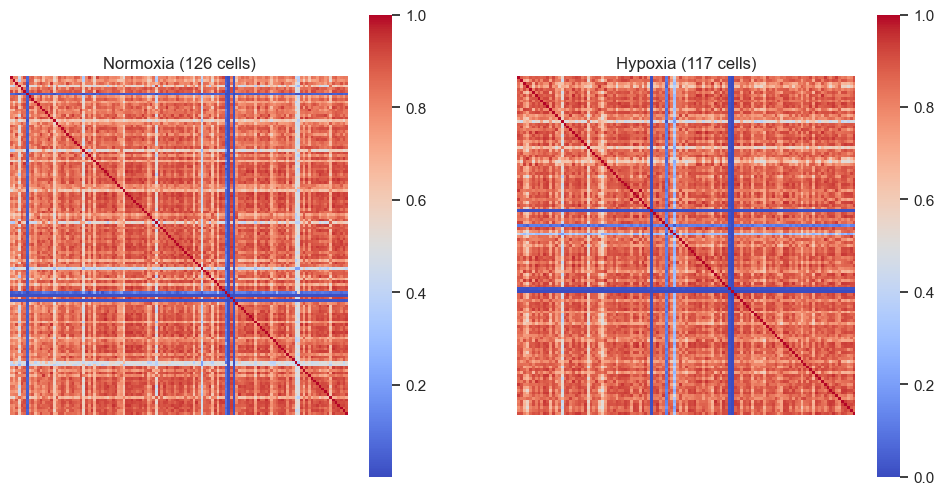

Shape of correlation matrix for normoxia: torch.Size([126, 126])
Shape of correlation matrix for hypoxia: torch.Size([117, 117])


In [39]:
# Now let us inspect if the correlation is different between the two classes
# We can do this by plotting the correlation matrix for each class separately
# We can do this by splitting the dataframe into two dataframes, one for each class

merged_norm = merged[merged['Target'] == 0]
merged_hypo = merged[merged['Target'] == 1]

# Convert the DataFrames to PyTorch tensors
data_tensor_norm = th.tensor(merged_norm.values)
data_tensor_hypo = th.tensor(merged_hypo.values)

# Calculate the correlation matrices
correlation_matrix_norm = th.corrcoef(data_tensor_norm)
correlation_matrix_hypo = th.corrcoef(data_tensor_hypo)

# Plot the correlation matrices with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(correlation_matrix_norm, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[0], square=True)
sns.heatmap(correlation_matrix_hypo, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[1], square=True)
# Set titles with number of genes that are norm or hypo
axs[0].set_title(f'Normoxia ({merged_norm.shape[0]} cells)')
axs[1].set_title(f'Hypoxia ({merged_hypo.shape[0]} cells)')
plt.show() 

# Check shape of correlation matrices
print("Shape of correlation matrix for normoxia:", correlation_matrix_norm.shape)
print("Shape of correlation matrix for hypoxia:", correlation_matrix_hypo.shape)

Normalization

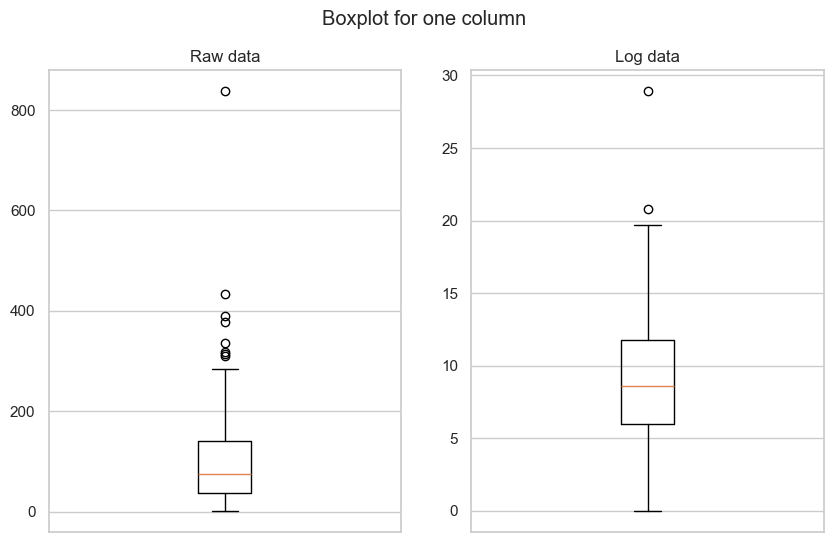

In [57]:
# Highly non normal distribution hence we take concave transformations the features
# Inspect first a single randomly selected feature

# Select a random index with seed
np.random.seed(42)
randomindex = np.random.randint(0, merged.shape[0])

# Apply the square root of the feature with random index
merged_squareroot = np.sqrt(merged[merged.columns[randomindex]])
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one column")
axs[0].boxplot(merged[merged.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(merged_squareroot)
axs[1].set_title("Log data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

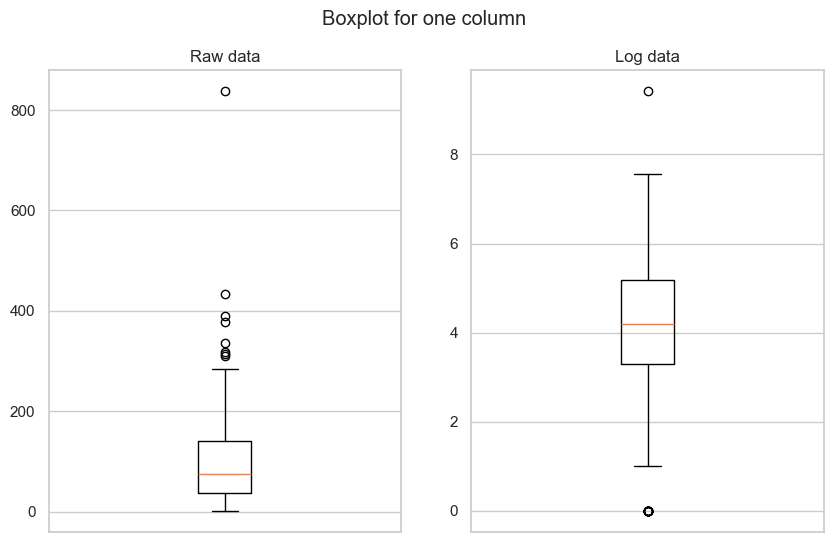

In [58]:
merged_cuberoot = np.cbrt(merged[merged.columns[randomindex]])
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one column")
axs[0].boxplot(merged[merged.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(merged_cuberoot)
axs[1].set_title("Log data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

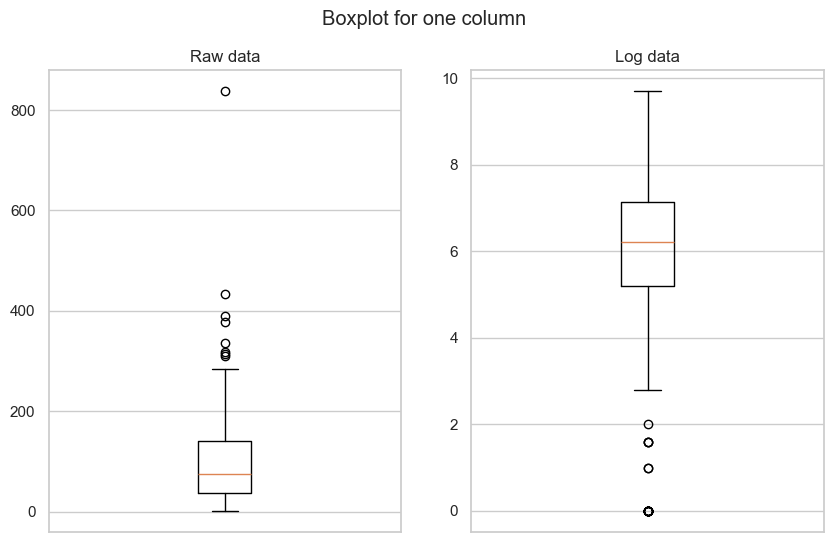

In [59]:
merged_log2 = np.log2(merged[merged.columns[randomindex]]+1)
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one column")
axs[0].boxplot(merged[merged.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(merged_log2)
axs[1].set_title("Log data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

Skewness of raw data: 2.4178802137062276
Skewness of log transformed data: -1.4978866634479544
Skewness of square root transformed data: 0.2812446437174879
Skewness of cube root transformed data: -0.6034610843496699


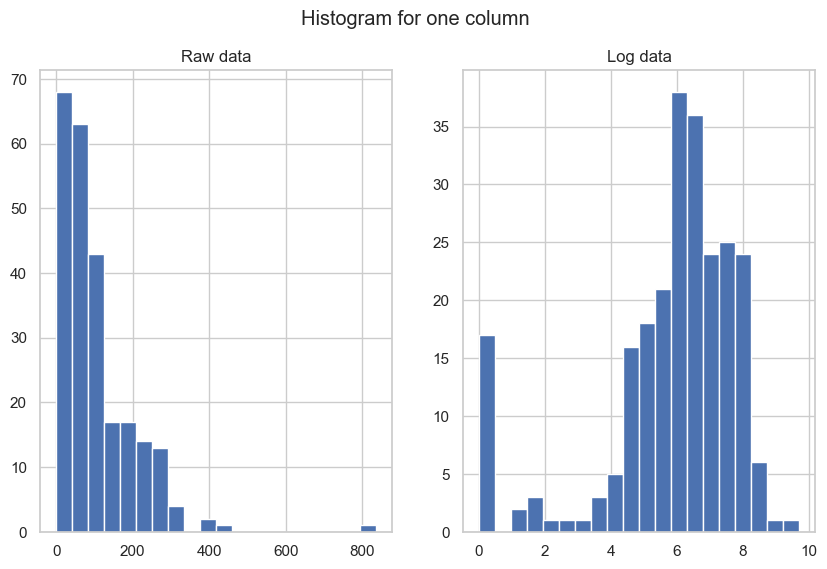

In [69]:
# Prove that log transformation is the best
# Calculate the skewness of the raw data
skewness_raw = merged[merged.columns[randomindex]].skew()
# Calculate the skewness of the log transformed data
skewness_log = np.log2(merged[merged.columns[randomindex]]+1).skew()
# Calculate the skewness of the square root transformed data
skewness_sqrt = np.sqrt(merged[merged.columns[randomindex]]).skew()
# Calculate the skewness of the cube root transformed data
skewness_cbrt = np.cbrt(merged[merged.columns[randomindex]]).skew()
# Print the skewness values
print(f"Skewness of raw data: {skewness_raw}")
print(f"Skewness of log transformed data: {skewness_log}")
print(f"Skewness of square root transformed data: {skewness_sqrt}")
print(f"Skewness of cube root transformed data: {skewness_cbrt}")

# Plot the histogram of transformed column, inspect why the skewness is negative
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Histogram for one column")
axs[0].hist(merged[merged.columns[randomindex]], bins=20)
axs[0].set_title("Raw data")
axs[0].grid(True)
axs[1].hist(merged_log2, bins=20)
axs[1].set_title("Log data")
axs[1].grid(True)

Skewness of log transformed data: 2.566246160450135
Skewness of cube root transformed data: 2.7500506805932017
Skewness of square root transformed data: 3.4681211477391485


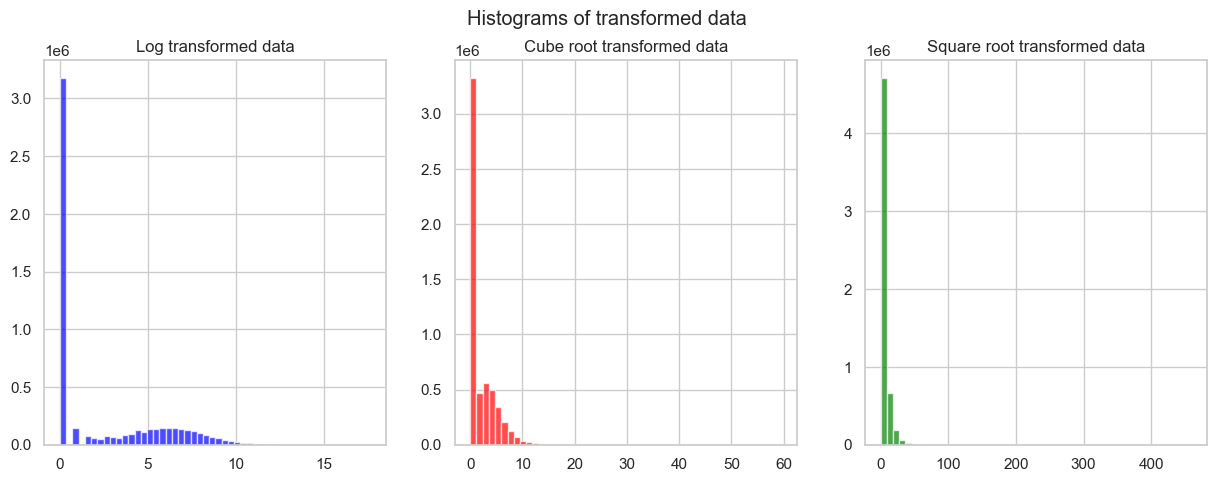

In [61]:
# Ideally we see log worked the best for this randomly selected random feature, now we apply the 3 on all the dataset
# Apply the log transformation to the entire dataset
merged_log = np.log2(merged+1)
merged_cbrt = np.cbrt(merged)
merged_sqrt = np.sqrt(merged)
# Check skewness of the transformed data
skewness_log = merged_log.skew()
skewness_cbrt = merged_cbrt.skew()
skewness_sqrt = merged_sqrt.skew()
# Print the skewness values
print(f"Skewness of log transformed data: {skewness_log.mean()}")
print(f"Skewness of cube root transformed data: {skewness_cbrt.mean()}")
print(f"Skewness of square root transformed data: {skewness_sqrt.mean()}")
# Plot the histograms of the transformed data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Histograms of transformed data")
axs[0].hist(merged_log.values.flatten(), bins=50, color='blue', alpha=0.7)
axs[0].set_title("Log transformed data")
axs[1].hist(merged_cbrt.values.flatten(), bins=50, color='red', alpha=0.7)
axs[1].set_title("Cube root transformed data")
axs[2].hist(merged_sqrt.values.flatten(), bins=50, color='green', alpha=0.7)
axs[2].set_title("Square root transformed data")
plt.show()

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


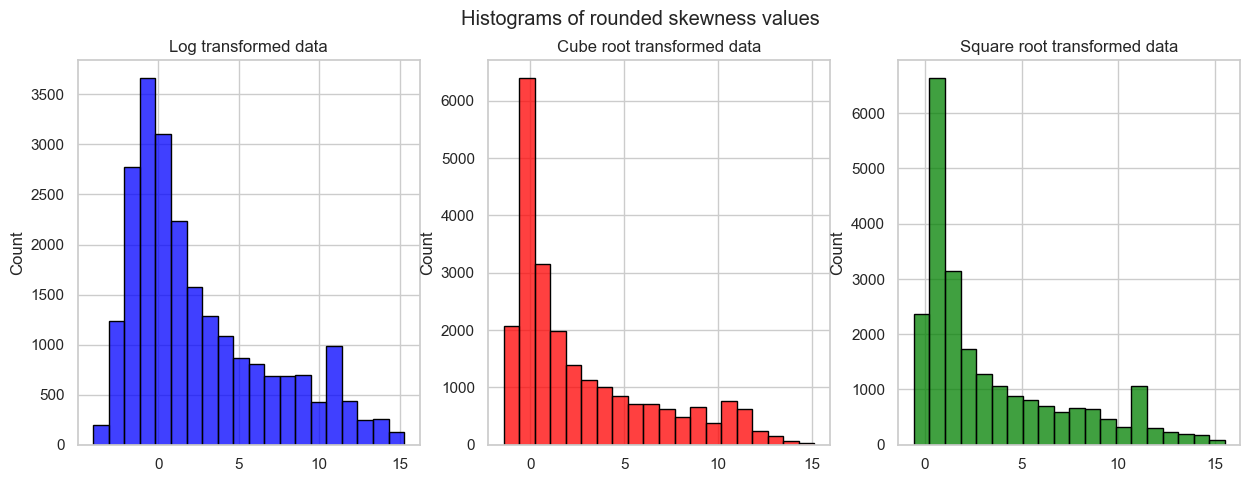

In [63]:
# Round the skewness values
rounded_skewness_log = np.round(skewness_log, decimals=2)
rounded_skewness_cbrt = np.round(skewness_cbrt, decimals=2)
rounded_skewness_sqrt = np.round(skewness_sqrt, decimals=2)
# Set seaborn style
sns.set(style="whitegrid")

# Plot 3 histogram of rounded skewness values
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Histograms of rounded skewness values")
sns.histplot(rounded_skewness_log, bins=20, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title("Log transformed data")
sns.histplot(rounded_skewness_cbrt, bins=20, color='red', edgecolor='black', ax=axs[1])
axs[1].set_title("Cube root transformed data")
sns.histplot(rounded_skewness_sqrt, bins=20, color='green', edgecolor='black', ax=axs[2])
axs[2].set_title("Square root transformed data")
plt.show()